In [ ]:
import zmq
import random
import sys
import time
from io import StringIO
import PIL.Image
import base64
from IPython.display import display, HTML
import json
import re

'''
from IPython.display import Image
from IPython.core.display import Image, display
'''

port = "5555"
context = zmq.Context()
socket = context.socket(zmq.REQ)
socket.connect("tcp://localhost:%s" % port)

print('before while')
while True:
    print("come into while client")
    q1 = '기안'
    q2 = '수영'
    q3 = '뭐'
    q_list = []
    q_list.append(q1)
    q_list.append(q2)
    q_list.append(q3)
    jj = json.dumps(q_list)
    
    socket.send_string(jj)
    print('send done')
#    data = socket.recv()
    decoded = socket.recv_string()
    
#    print(data)
#    decoded = data.decode("utf-8")
    decoded = json.loads(decoded)
    print('json load done')
    
#    print(decoded)
    #print(decoded)
    for y in decoded:
#        y = json.loads(y)
        if y['find_success'] == False:
            print('====dont know that word TT')
            continue

        for text in y['memes']:
            decoded = y['memes'][text].replace("'", '"')
            decoded = re.search(r'\"(.*)\"', decoded).group(1)
            display(HTML('''<img src="data:image/png;base64,''' + decoded + '''">'''))    
            print(text)
        print("--- done ---")
        
    # assume data contains your decoded image
    '''
    imgdata = base64.b64decode(data)
    file_like = StringIO.StringIO(data)
    img = PIL.Image.open(file_like)
    img.show()
    '''
    #    display(Image(PATH, width=300, height=300))

    time.sleep(1)
    break

In [22]:
import client

In [23]:
aa = client.MgClient()


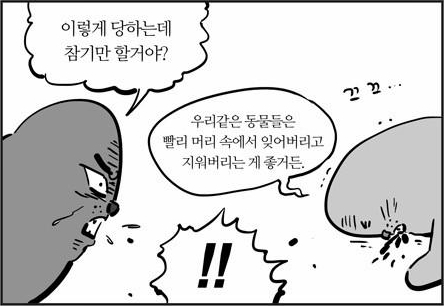

121화_사자의_모험_上
이렇게 당하는데 참기만 할거야 우리 같은 동물들은 빨리 머리 속에서 잊어버리고 지워버리는 게 좋거든 
--- done ---


In [25]:
aa.show_result(aa.dank(['고양이'], 5, 0.15))
#aa.show_result(aa.random())

In [6]:
import sent2vec
from gensim.models import KeyedVectors

In [23]:
vec = '/root/shared_data/embedding/fast_sent.vec'

In [24]:
word_vector = KeyedVectors.load_word2vec_format(vec)

In [51]:
wlist = word_vector.index2entity

In [53]:
len(wlist)

4486

In [38]:
from random import randint
import random

In [69]:
random.seed()
print(randint(0, 2))


2
